## Temperature data by Country
Unless otherwise noted temperatures in fahrenheit and CO2 thousands metric tons will be displayed in separate charts because of scale differences.

## Temperature Data Source:
* Data.World: https://data.world/data-society/global-climate-change-data
* Original Data Source:
* Kaggle: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
* Berkeley Earth Raw data:  http://berkeleyearth.org/data/
* Explains their data cleansing process: http://berkeleyearth.org/about-data-set/


## Countries with CO2 and Temperature data 1850 - 2012
Sweden,
Canada,
France,
UK,
Spain,
Poland

## Countries with CO2 and Temperature data 1878 - 2012
USA,
Australia,
India

## G20 Countries
The G20 consists of Argentina, Australia, Brazil, Canada, China, France, Germany, India, Indonesia, Italy, Japan, Mexico, Russia, Saudi Arabia, South Africa, South Korea, Turkey, United Kingdom, United States, and the European Union.


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
# Set my default color palette
mycolors = ["royalblue", "blue", "red", "green", "cyan", "orange", 
            "purple", "olive", "limegreen", "magenta", ]
sns.set_palette(mycolors)

In [2]:
# Store filepath in a variable: use parse_dates=["date"] 
# 
ltc = "./data/clean/clean_GlobalLandTemperaturesByCountry.csv"

# Read our Data file with the pandas library
ltc_df = pd.read_csv(ltc,parse_dates=["m_date"],encoding="ISO-8859-1")
print(len(ltc_df.index))
ltc_df.info()

539647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539647 entries, 0 to 539646
Data columns (total 5 columns):
m_date                        539647 non-null datetime64[ns]
mthly_avg_temp_f              539647 non-null float64
mthly_avg_temp_c              539647 non-null float64
mthly_avg_temp_uncertainty    539647 non-null float64
country                       539647 non-null object
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 20.6+ MB


In [3]:
ltc_df.head()

,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country
0,1744-04-01,56.4350,13.575,2.355,Albania
1,1744-04-01,52.0502,11.139,2.315,Andorra
2,1744-04-01,45.7682,7.649,2.547,Austria
3,1744-04-01,45.9932,7.774,3.281,Belarus
4,1744-04-01,48.4862,9.159,2.577,Belgium


In [4]:
ltc1_df = ltc_df.loc[(ltc_df["country"] == "United States") &
                       (ltc_df["m_date"]>= "2000-01-01")]
ltc1_df = ltc1_df.sort_values(["m_date"], ascending=[True]).\
                                reset_index(drop=True)
print(len(ltc1_df.index))
ltc1_df.head()

156


,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country
0,2000-01-01,27.7916,-2.338,0.149,United States
1,2000-02-01,35.6090,2.005,0.157,United States
2,2000-03-01,41.2628,5.146,0.135,United States
3,2000-04-01,48.0722,8.929,0.121,United States
4,2000-05-01,59.1530,15.085,0.177,United States


In [5]:
# Get the min and max date range
ltc1_min_tmp = ltc1_df["mthly_avg_temp_f"].min()
ltc1_max_tmp = ltc1_df["mthly_avg_temp_f"].max()
print("min temperature (F) " + str(ltc1_min_tmp) +\
      " max temperature (F) " + \
      str(ltc1_max_tmp))

min temperature (F) 25.0106 max temperature (F) 73.4144


In [6]:
# Get the min and max date range
ltc1_min_date = ltc1_df["m_date"].min()
ltc1_max_date = ltc1_df["m_date"].max()
print("min year " + str(ltc1_min_date) + " max year " + \
      str(ltc1_max_date))

min year 2000-01-01 00:00:00 max year 2012-12-01 00:00:00


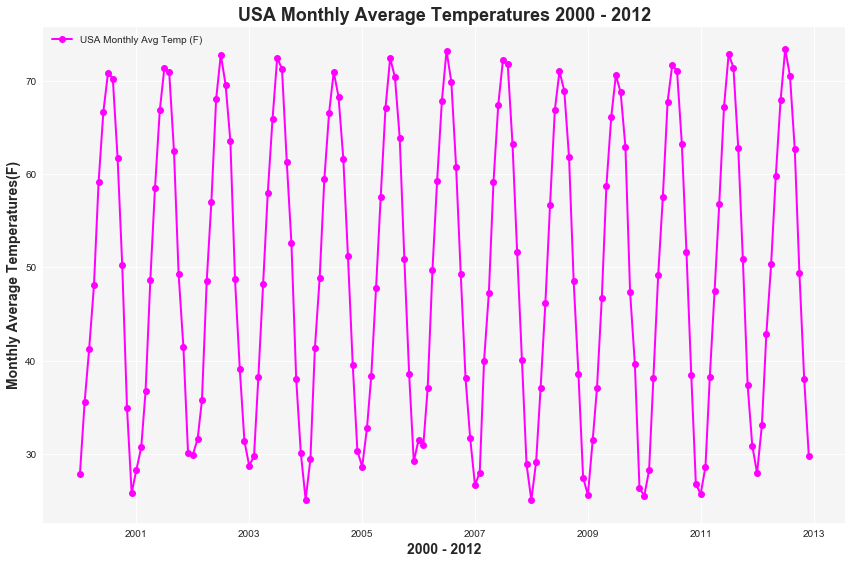

In [7]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = ltc1_df["m_date"]  
y_axis = ltc1_df["mthly_avg_temp_f"]

ax.set_title("USA Monthly Average Temperatures 2000 - 2012",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("2000 - 2012",weight='bold').set_fontsize('14')
ax.set_ylabel("Monthly Average Temperatures(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
# fig.autofmt_xdate(rotation=45, ha='right')
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.plot(x_axis, y_axis, color="magenta", marker='o', linewidth= 2)

ax.legend(["USA Monthly Avg Temp (F)"], loc="upper left")

plt.tight_layout()
plt.savefig("./images/2000-2012_usa_temp_chart.png")
plt.show()

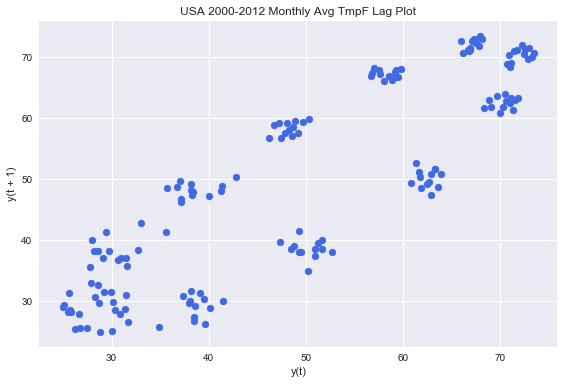

In [8]:
from pandas.plotting import lag_plot

plt.figure()
data = ltc1_df["mthly_avg_temp_f"]
plt.title("USA 2000-2012 Monthly Avg TmpF Lag Plot")
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/usa_mthly_lag-plot_tmpf.png")
plt.show()

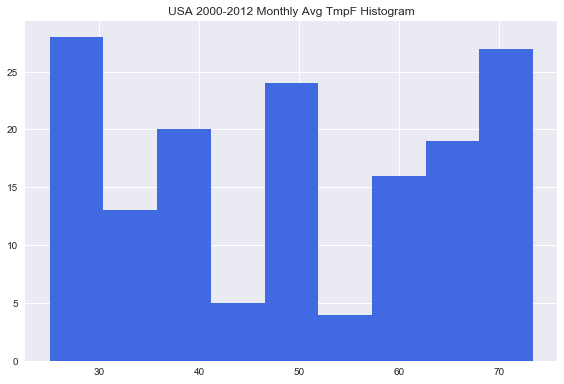

In [9]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(ltc1_df["mthly_avg_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("USA 2000-2012 Monthly Avg TmpF Histogram")
plt.tight_layout()
plt.savefig("./images/usa_mthly_avg_tmpf_histogram.png") 
plt.show()

In [10]:
# create a year column for grouping
ltc1_df["month"] = ltc1_df["m_date"].dt.month
print(len(ltc1_df.index))
ltc1_df.head(5)

156


,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country,month
0,2000-01-01,27.7916,-2.338,0.149,United States,1
1,2000-02-01,35.6090,2.005,0.157,United States,2
2,2000-03-01,41.2628,5.146,0.135,United States,3
3,2000-04-01,48.0722,8.929,0.121,United States,4
4,2000-05-01,59.1530,15.085,0.177,United States,5


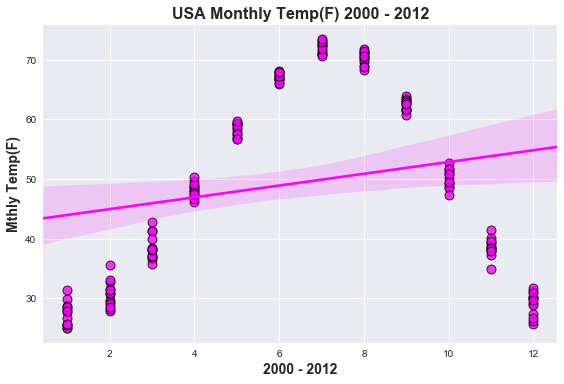

In [11]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates
import seaborn as sns


x_axis = ltc1_df["month"]  
y_axis = ltc1_df["mthly_avg_temp_f"]

sns.regplot(x=x_axis, y=y_axis, color="magenta", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1,"edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("USA Monthly Temp(F) 2000 - 2012", 
              weight='bold').set_fontsize('16')
sns.plt.xlabel("2000 - 2012", weight='bold').set_fontsize('14')
sns.plt.ylabel("Mthly Temp(F)", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/usa_mthly_tmpf_2000-2012_scatter.png",
            bbox_inches="tight")
plt.show()

In [12]:
ltc2_df = ltc_df.loc[(ltc_df["country"] == "Australia") &
                       (ltc_df["m_date"]>= "2000-01-01")]
ltc2_df = ltc2_df.sort_values(["m_date"], ascending=[True]).\
                                reset_index(drop=True)
print(len(ltc2_df.index))
ltc2_df.head()

156


,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country
0,2000-01-01,80.7278,27.071,0.173,Australia
1,2000-02-01,81.2606,27.367,0.189,Australia
2,2000-03-01,77.8532,25.474,0.178,Australia
3,2000-04-01,71.4146,21.897,0.085,Australia
4,2000-05-01,62.5316,16.962,0.156,Australia


In [13]:
# Get the min and max date range
ltc2_min_tmp = ltc2_df["mthly_avg_temp_f"].min()
ltc2_max_tmp = ltc2_df["mthly_avg_temp_f"].max()
print("min temperature (F) " + str(ltc2_min_tmp) +\
      " max temperature (F) " + \
      str(ltc2_max_tmp))

min temperature (F) 56.7032 max temperature (F) 84.7364


In [14]:
# Get the min and max date range
ltc2_min_date = ltc2_df["m_date"].min()
ltc2_max_date = ltc2_df["m_date"].max()
print("min year " + str(ltc2_min_date) + " max year " + \
      str(ltc2_max_date))

min year 2000-01-01 00:00:00 max year 2012-12-01 00:00:00


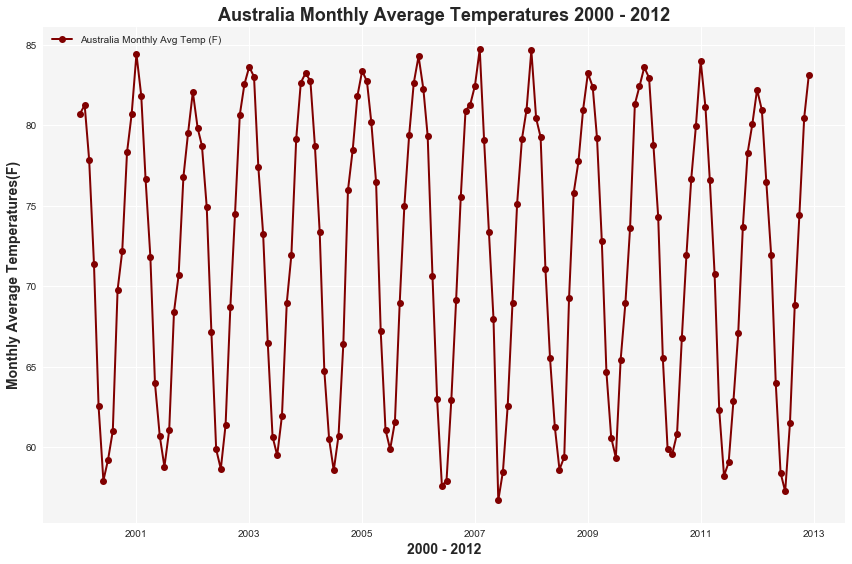

In [15]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = ltc2_df["m_date"]  
y_axis = ltc2_df["mthly_avg_temp_f"]

ax.set_title("Australia Monthly Average Temperatures 2000 - 2012",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("2000 - 2012",weight='bold').set_fontsize('14')
ax.set_ylabel("Monthly Average Temperatures(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
# fig.autofmt_xdate(rotation=45, ha='right')
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.plot(x_axis, y_axis, color="maroon", marker='o', linewidth= 2)

ax.legend(["Australia Monthly Avg Temp (F)"], loc="upper left")

plt.tight_layout()
plt.savefig("./images/2000-2012_australia_temp_chart.png")
plt.show()

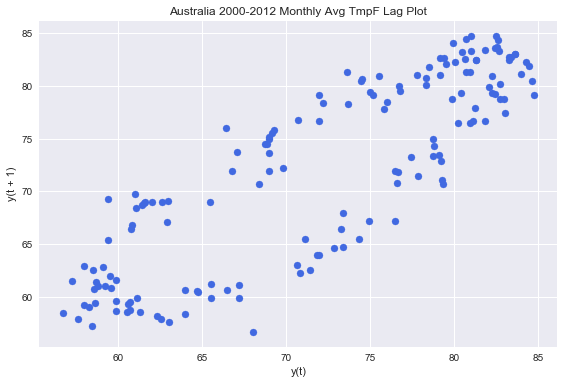

In [16]:
from pandas.plotting import lag_plot

plt.figure()
data = ltc2_df["mthly_avg_temp_f"]
plt.title("Australia 2000-2012 Monthly Avg TmpF Lag Plot")
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/australia_mthly_lag-plot_tmpf.png")
plt.show()

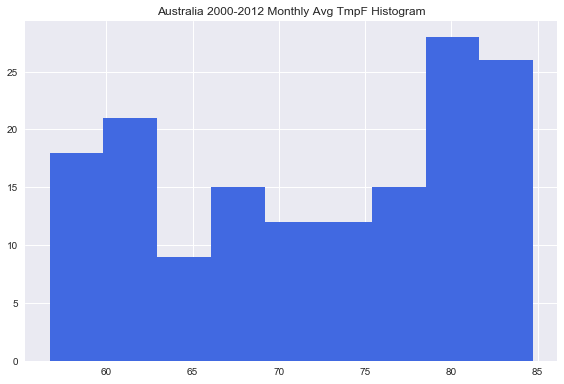

In [17]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(ltc2_df["mthly_avg_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("Australia 2000-2012 Monthly Avg TmpF Histogram")
plt.tight_layout()
plt.savefig("./images/australia_mthly_avg_tmpf_histogram.png") 
plt.show()

In [18]:
# create a year column for grouping
ltc2_df["month"] = ltc2_df["m_date"].dt.month
print(len(ltc2_df.index))
ltc2_df.head(5)

156


,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country,month
0,2000-01-01,80.7278,27.071,0.173,Australia,1
1,2000-02-01,81.2606,27.367,0.189,Australia,2
2,2000-03-01,77.8532,25.474,0.178,Australia,3
3,2000-04-01,71.4146,21.897,0.085,Australia,4
4,2000-05-01,62.5316,16.962,0.156,Australia,5


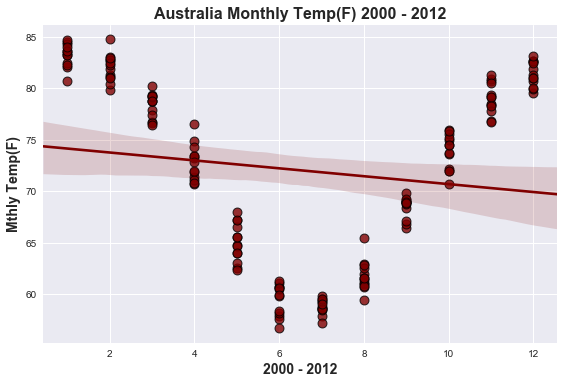

In [19]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates
import seaborn as sns


x_axis = ltc2_df["month"]  
y_axis = ltc2_df["mthly_avg_temp_f"]

sns.regplot(x=x_axis, y=y_axis, color="maroon", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1,"edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("Australia Monthly Temp(F) 2000 - 2012", 
              weight='bold').set_fontsize('16')
sns.plt.xlabel("2000 - 2012", weight='bold').set_fontsize('14')
sns.plt.ylabel("Mthly Temp(F)", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/australia_mthly_tmpf_2000-2012_scatter.png",
            bbox_inches="tight")
plt.show()

In [20]:
ltc3_df = ltc_df.loc[(ltc_df["country"] == "India") &
                       (ltc_df["m_date"]>= "2000-01-01")]
ltc3_df = ltc3_df.sort_values(["m_date"], ascending=[True]).\
                                reset_index(drop=True)
print(len(ltc3_df.index))
ltc3_df.head()

156


,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country
0,2000-01-01,64.1120,17.840,0.210,India
1,2000-02-01,66.3278,19.071,0.159,India
2,2000-03-01,74.6132,23.674,0.183,India
3,2000-04-01,83.9624,28.868,0.190,India
4,2000-05-01,86.1602,30.089,0.166,India


In [21]:
# Get the min and max date range
ltc3_min_date = ltc3_df["m_date"].min()
ltc3_max_date = ltc3_df["m_date"].max()
print("min year " + str(ltc3_min_date) + " max year " + \
      str(ltc3_max_date))

min year 2000-01-01 00:00:00 max year 2012-12-01 00:00:00


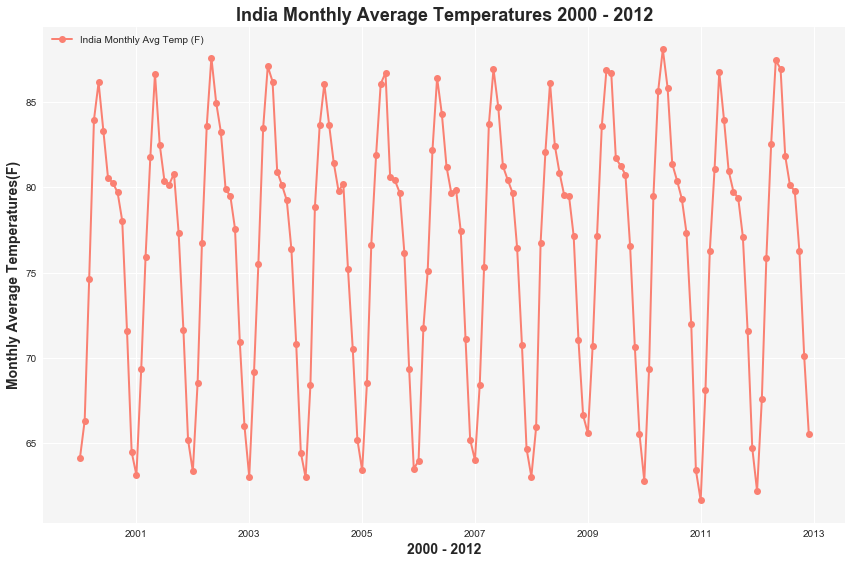

In [22]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = ltc3_df["m_date"]  
y_axis = ltc3_df["mthly_avg_temp_f"]

ax.set_title("India Monthly Average Temperatures 2000 - 2012",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("2000 - 2012",weight='bold').set_fontsize('14')
ax.set_ylabel("Monthly Average Temperatures(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
# fig.autofmt_xdate(rotation=45, ha='right')
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.plot(x_axis, y_axis, color="salmon", marker='o', linewidth= 2)

ax.legend(["India Monthly Avg Temp (F)"], loc="upper left")

plt.tight_layout()
plt.savefig("./images/2000-2012_india_temp_chart.png")
plt.show()

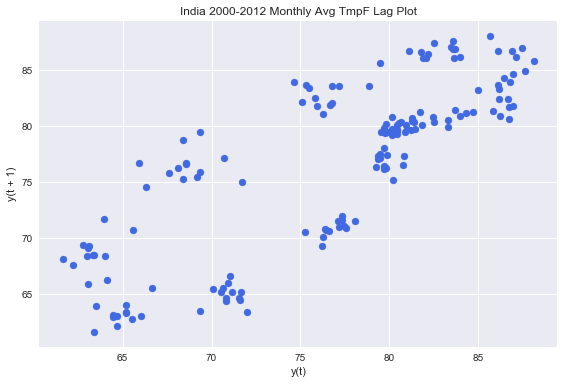

In [23]:
from pandas.plotting import lag_plot

plt.figure()
data = ltc3_df["mthly_avg_temp_f"]
plt.title("India 2000-2012 Monthly Avg TmpF Lag Plot")
lag_plot(data)

plt.tight_layout()
plt.savefig("./images/india_mthly_lag-plot_tmpf.png")
plt.show()

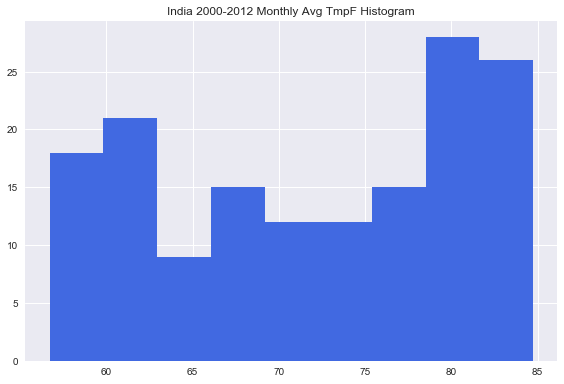

In [24]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(ltc2_df["mthly_avg_temp_f"]) 
plt.hist(a, bins='auto') 
plt.title("India 2000-2012 Monthly Avg TmpF Histogram")
plt.tight_layout()
plt.savefig("./images/india_mthly_avg_tmpf_histogram.png") 
plt.show()

In [25]:
# create a year column for grouping
ltc3_df["month"] = ltc3_df["m_date"].dt.month
print(len(ltc3_df.index))
ltc3_df.head(5)

156


,m_date,mthly_avg_temp_f,mthly_avg_temp_c,mthly_avg_temp_uncertainty,country,month
0,2000-01-01,64.1120,17.840,0.210,India,1
1,2000-02-01,66.3278,19.071,0.159,India,2
2,2000-03-01,74.6132,23.674,0.183,India,3
3,2000-04-01,83.9624,28.868,0.190,India,4
4,2000-05-01,86.1602,30.089,0.166,India,5


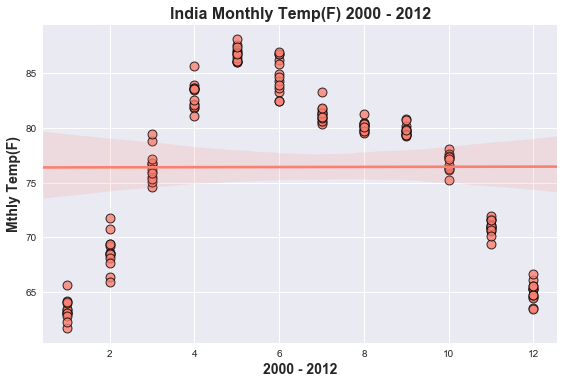

In [26]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates
import seaborn as sns


x_axis = ltc3_df["month"]  
y_axis = ltc3_df["mthly_avg_temp_f"]

sns.regplot(x=x_axis, y=y_axis, color="salmon", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1,"edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("India Monthly Temp(F) 2000 - 2012", 
              weight='bold').set_fontsize('16')
sns.plt.xlabel("2000 - 2012", weight='bold').set_fontsize('14')
sns.plt.ylabel("Mthly Temp(F)", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/india_mthly_tmpf_2000-2012_scatter.png",
            bbox_inches="tight")
plt.show()

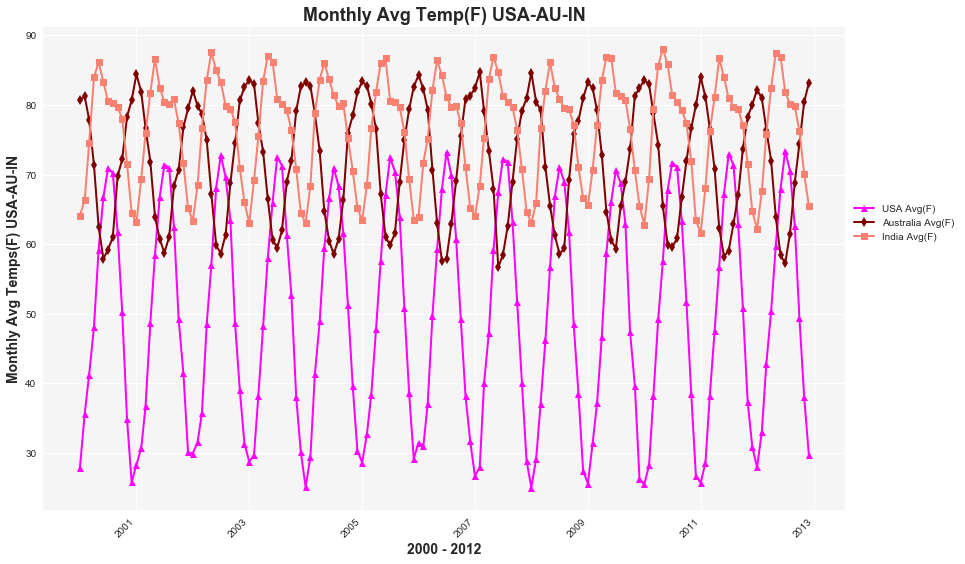

In [27]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = ltc1_df["m_date"]  
y1_axis = ltc1_df["mthly_avg_temp_f"]
y2_axis = ltc2_df["mthly_avg_temp_f"]
y3_axis = ltc3_df["mthly_avg_temp_f"]




ax.set_title("Monthly Avg Temp(F) USA-AU-IN",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("2000 - 2012", weight='bold').set_fontsize('14')
ax.set_ylabel("Monthly Avg Temps(F) USA-AU-IN", 
              weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="magenta", marker='^', linewidth= 2)
ax.plot(x_axis, y2_axis, color="maroon", marker='d', linewidth= 2)
ax.plot(x_axis, y3_axis, color="salmon", marker='s', linewidth= 2)



ax.legend(["USA Avg(F)","Australia Avg(F)","India Avg(F)"],
          bbox_to_anchor=(1.0,.65))

plt.tight_layout()
plt.savefig("./images/montly_avg_tempf_usa-au-in.png")
plt.show()

## Box and Whisker Plots
Another useful way to review the distribution of each attribute 
is to use Box and Whisker Plots or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

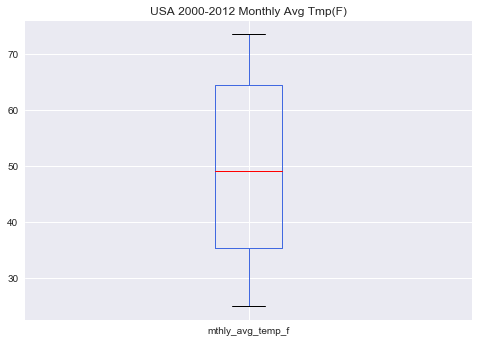

In [28]:
# Box and Whisker Plots
from matplotlib import pyplot

ltc1_df["mthly_avg_temp_f"].plot(kind='box', 
        title="USA 2000-2012 Monthly Avg Tmp(F)", 
        sharex=False, sharey=False)
plt.savefig("./images/usa_2000-2012_box_plot.png")
pyplot.show()

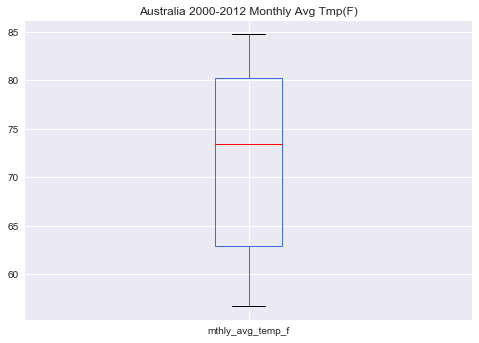

In [29]:
# Box and Whisker Plots
from matplotlib import pyplot

ltc2_df["mthly_avg_temp_f"].plot(kind='box', 
        title="Australia 2000-2012 Monthly Avg Tmp(F)", 
        sharex=False, sharey=False)
plt.savefig("./images/australia_2000-2012_box_plot.png")
pyplot.show()

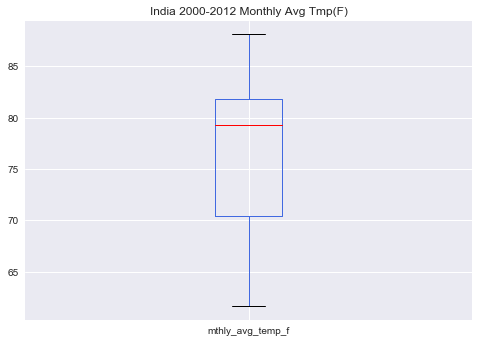

In [30]:
# Box and Whisker Plots
from matplotlib import pyplot

ltc3_df["mthly_avg_temp_f"].plot(kind='box', 
        title="India 2000-2012 Monthly Avg Tmp(F)", 
        sharex=False, sharey=False)
plt.savefig("./images/india_2000-2012_box_plot.png")
pyplot.show()